In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [4]:
#pip install --user imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
Note: you may need to restart the kernel to use updated packages.


Package installation required:
Imblearn  
Pip: pip install imblearn  
conda: conda install -c conda-forge imbalanced-learn

### Loading Dataset

In [2]:
data = pd.read_csv('data_csv.csv')

In [3]:
data.head()


,date,zip,state,lat,long,race,Age,Gender,Pollen_Tree,Pollen_weed,Pollen_Grass,Exacb
0,2/10/2018,23409,VA,37.859953,-75.629950,White,63,Female,5,0,2,Yes
1,8/27/2015,99348,WA,46.408852,-118.448760,Black,50,Male,1,0,4,No
2,7/28/2018,68902,NE,40.589594,-98.397248,Other,22,Female,1,0,2,No
3,1/29/2012,55746,MN,47.413817,-92.942280,Other,34,Male,1,0,5,No
4,5/26/2012,81073,CO,37.409787,-102.617260,Black,44,Female,1,0,2,No


In [4]:
data.shape

(1193, 12)

In [5]:
data.dtypes

date             object
zip               int64
state            object
lat             float64
long            float64
race             object
Age               int64
Gender           object
Pollen_Tree       int64
Pollen_weed       int64
Pollen_Grass      int64
Exacb            object
dtype: object

In [6]:
#changing Zip from int to object as it doesnot behave as ordinal variable 
data['zip']= data['zip'].astype(str)

In [7]:
data.describe()

,lat,long,Age,Pollen_Tree,Pollen_weed,Pollen_Grass
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,38.386727,-91.215451,40.173512,2.481978,2.148365,2.274937
std,5.285788,15.124762,13.529085,1.738785,1.529558,1.560261
min,18.003125,-169.559580,18.000000,0.000000,0.000000,0.000000
25%,35.101727,-97.209180,28.000000,1.000000,1.000000,1.000000
50%,39.036361,-88.161240,40.000000,3.000000,2.000000,2.000000
75%,41.689600,-80.467765,52.000000,4.000000,3.000000,3.000000
max,63.882081,-66.011940,65.000000,5.000000,5.000000,5.000000


In [8]:
data.describe(include='object')

,date,zip,state,race,Gender,Exacb
count,1193,1193,1193,1193,1193,1193
unique,965,1176,52,5,2,2
top,12/21/2016,59803,CA,Unknown,Female,No
freq,4,2,81,258,597,904


In [9]:
#Null value in each column
data.isnull().sum()

date            0
zip             0
state           0
lat             0
long            0
race            0
Age             0
Gender          0
Pollen_Tree     0
Pollen_weed     0
Pollen_Grass    0
Exacb           0
dtype: int64

In [10]:
#If any missing value found 
#creating a transform function to fill missing value by either mean or mode 
f = lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
data = data.fillna(data.groupby('race').transform(f))


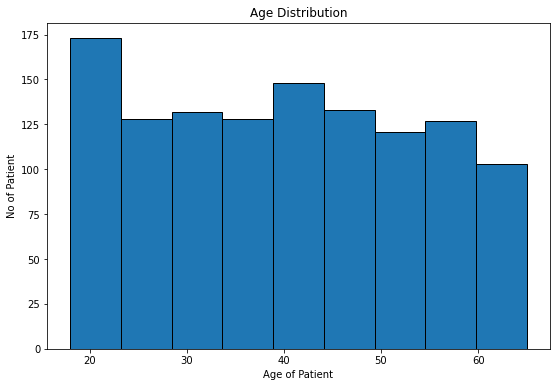

In [11]:
plt.figure(figsize=(9,6))
plt.hist(data['Age'], bins=9, edgecolor='black')
plt.xlabel('Age of Patient')
plt.ylabel('No of Patient')
plt.title('Age Distribution')
plt.show()

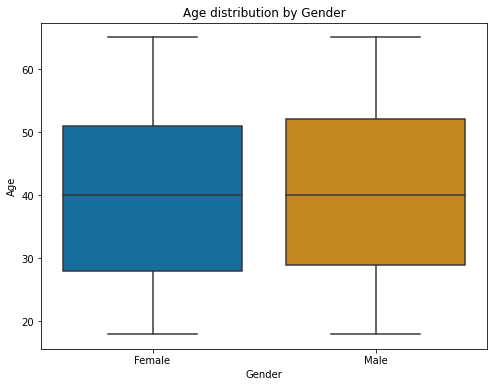

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Gender',y='Age',palette='colorblind')
plt.title("Age distribution by Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.show()


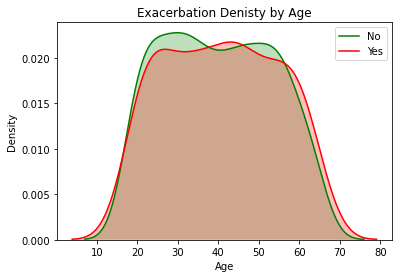

In [13]:
age_sur = sns.kdeplot(data["Age"][(data["Exacb"] == 'No')], color="Green", shade = True)
age_sur = sns.kdeplot(data["Age"][(data["Exacb"] == 'Yes')], ax = age_sur, color="Red", shade= True)
age_sur.set_xlabel("Age")
age_sur.set_ylabel("Density")
age_sur.set_title("Exacerbation Denisty by Age")
age_sur = age_sur.legend(["No","Yes"])

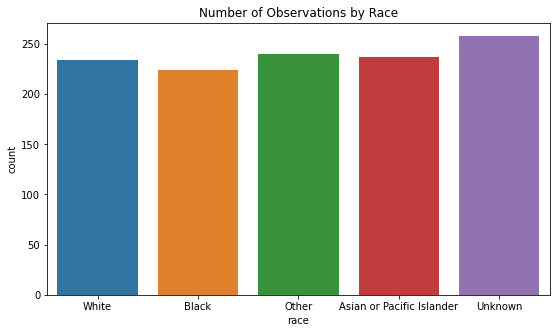

In [14]:
plt.figure(figsize=(9,5))
sns.countplot(data = data, x= 'race')
plt.title("Number of Observations by Race")
plt.show()

In [ ]:
#pip install plotly

In [ ]:
'''import plotly.graph_objects as go

d = dict(Yes = 'red', No = 'green')
#fig = px.scatter_geo(data,lat='lat',lon='long' , text = data['Age'], marker_color = data['Exacb'])

fig = go.Figure(data=go.Scattergeo(
        lon = data['long'],
        lat = data['lat'],
        text = data['Exacb'],
        mode = 'markers',
        marker_color = [d[s] for s in data['Exacb']],
        ))
           
fig.update_layout(
        title = '''Patients check Ins: 
        Experienced exacerbation: Red
        Didn't experience difficulties: Green''',
        geo_scope='usa',
    )
fig.show()
'''

### Corelation matrix 

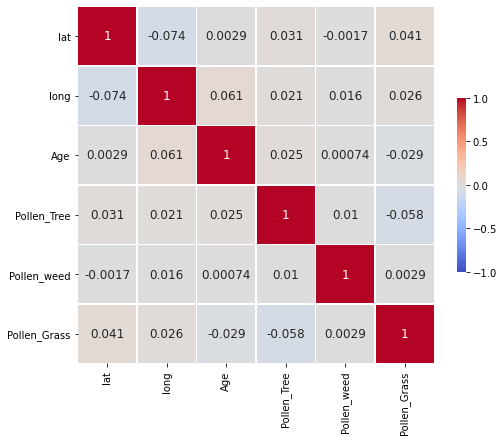

In [15]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(8, 8)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

No multicolinearity noted

In [16]:
data.describe(include='object')

,date,zip,state,race,Gender,Exacb
count,1193,1193,1193,1193,1193,1193
unique,965,1176,52,5,2,2
top,12/21/2016,59803,CA,Unknown,Female,No
freq,4,2,81,258,597,904


# Encoding

In [17]:
#making a copy of data before encoding
edata = data.copy()


In [18]:
encode=LabelEncoder()
catcol = ['zip','state']

In [19]:
edata[catcol] = edata[catcol].apply(encode.fit_transform)

In [20]:
edata = pd.get_dummies(edata, prefix= ['Gender'], columns = ['Gender'])
edata = pd.get_dummies(edata, prefix= ['race'], columns = ['race'])


In [21]:
edata.head(5)

,date,zip,state,lat,long,Age,Pollen_Tree,Pollen_weed,Pollen_Grass,Exacb,Gender_Female,Gender_Male,race_Asian or Pacific Islander,race_Black,race_Other,race_Unknown,race_White
0,2/10/2018,192,46,37.859953,-75.629950,63,5,0,2,Yes,1,0,0,0,0,0,1
1,8/27/2015,1170,48,46.408852,-118.448760,50,1,0,4,No,0,1,0,1,0,0,0
2,7/28/2018,819,29,40.589594,-98.397248,22,1,0,2,No,1,0,0,0,1,0,0
3,1/29/2012,643,23,47.413817,-92.942280,34,1,0,5,No,0,1,0,0,1,0,0
4,5/26/2012,970,5,37.409787,-102.617260,44,1,0,2,No,1,0,0,1,0,0,0


In [22]:
edata.describe(include='object')

,date,Exacb
count,1193,1193
unique,965,2
top,12/21/2016,No
freq,4,904


In [23]:
#removing date variable, 
#week/month/year can be extracted as feature

edata.drop('date', axis=1, inplace=True)


In [24]:
edata.drop('zip', axis=1, inplace=True)

In [25]:
#needs scaling
scale = StandardScaler()
edata['lat'] = scale.fit_transform(np.array(edata['lat']).reshape(-1,1))
edata['long'] = scale.fit_transform(np.array(edata['long']).reshape(-1,1))

In [26]:
edata.head()

,state,lat,long,Age,Pollen_Tree,Pollen_weed,Pollen_Grass,Exacb,Gender_Female,Gender_Male,race_Asian or Pacific Islander,race_Black,race_Other,race_Unknown,race_White
0,46,-0.099700,1.030895,63,5,0,2,Yes,1,0,0,0,0,0,1
1,48,1.518315,-1.801333,50,1,0,4,No,0,1,0,1,0,0,0
2,29,0.416928,-0.475036,22,1,0,2,No,1,0,0,0,1,0,0
3,23,1.708520,-0.114220,34,1,0,5,No,0,1,0,0,1,0,0
4,5,-0.184901,-0.754167,44,1,0,2,No,1,0,0,1,0,0,0


# Modeling

In [27]:
X = edata.drop(columns='Exacb')
y = edata.Exacb

### Test/Train sample split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 21)


### Model 1: Logistic Regression

In [29]:
model0= LogisticRegression(random_state = 21,max_iter = 600)
model0.fit(X_train, y_train)

LogisticRegression(max_iter=600, random_state=21)

In [30]:
y_pred0= model0.predict(X_test) 
model0_accu = accuracy_score(y_test, y_pred0)
print("Accuracy of Logistic Regression model is    : {:.2f}"
          .format(model0_accu))

Accuracy of Logistic Regression model is    : 0.85


### Model 2: Decision Tree

In [31]:
model1 = DecisionTreeClassifier(max_leaf_nodes= 6, random_state = 21)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=21)

In [32]:
y_pred1= model1.predict(X_test)
model1_accu = accuracy_score(y_test, y_pred1)
print("Accuracy of Logistic Regression model is    : {:.2f}"
          .format(model1_accu))

Accuracy of Logistic Regression model is    : 0.83


<Figure size 360x360 with 0 Axes>

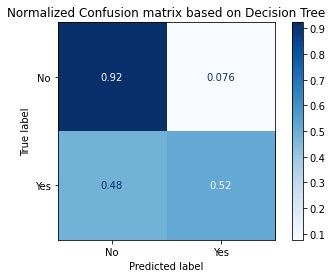

In [33]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues, normalize='true', display_labels= ["No", 'Yes'])  
plt.title("Normalized Confusion matrix based on Decision Tree")
plt.show()

### Model 3: Gradient Boosting

In [34]:
model2 =GradientBoostingClassifier(random_state = 21)
model2.fit(X_train, y_train)

GradientBoostingClassifier(random_state=21)

In [35]:
y_pred2 = model2.predict(X_test)
model2_acc=accuracy_score(y_test, y_pred2)
print("Accuracy of Gradient Boosting Classifier model is    : {:.2f}"
          .format(model2_acc))

Accuracy of Gradient Boosting Classifier model is    : 0.87


<Figure size 648x360 with 0 Axes>

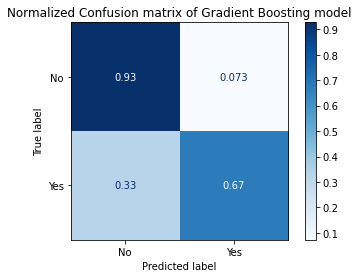

In [36]:
plt.figure(figsize=(9,5))
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues, normalize='true', display_labels= ["No", 'Yes']) 
plt.title("Normalized Confusion matrix of Gradient Boosting model")
plt.show()

###  Synthetic Minority Oversampling Technique

Generating synthetic data for the minority class to balance target class distribution 

In [37]:


smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({'No': 904, 'Yes': 289})
Resample dataset shape Counter({'Yes': 904, 'No': 904})


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state= 21)


### Model 4: Gradient Boosting (with balanced target class)

In [39]:
model3 =GradientBoostingClassifier(random_state = 21)
model3.fit(X_train, y_train)

GradientBoostingClassifier(random_state=21)

In [40]:
y_pred3 = model3.predict(X_test)
model3_acc=accuracy_score(y_test, y_pred3)
print("Accuracy of Gradient Boosting Classifier model is    : {:.2f}"
          .format(model3_acc))

Accuracy of Gradient Boosting Classifier model is    : 0.88


<Figure size 648x360 with 0 Axes>

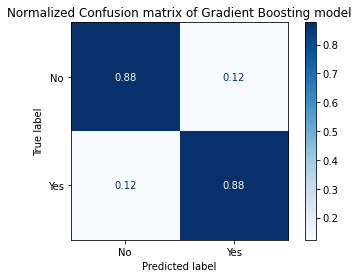

In [41]:
plt.figure(figsize=(9,5))
plot_confusion_matrix(model3, X_test, y_test, cmap=plt.cm.Blues, normalize='true', display_labels= ["No", 'Yes']) 
plt.title("Normalized Confusion matrix of Gradient Boosting model")
plt.show()

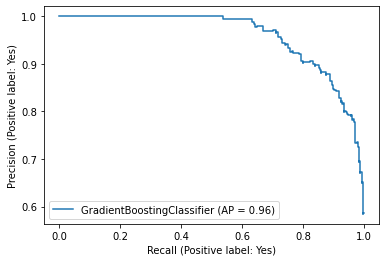

In [42]:
disp = plot_precision_recall_curve(model3, X_test, y_test)
plt.show()

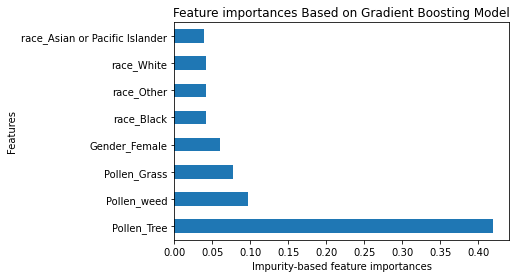

In [43]:
feat_importances = pd.Series(model3.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature importances Based on Gradient Boosting Model")
plt.xlabel('Impurity-based feature importances')
plt.ylabel('Features')
plt.show()

### Model 5: K-Nearest Neighbors (with balanced target class)

In [53]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [54]:
predicted = model.predict(X_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8232044198895028


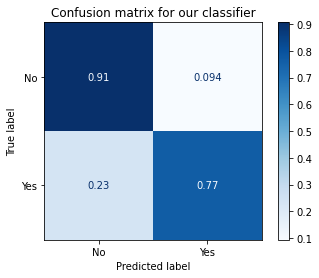

In [66]:
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

### Model 6: Support Vector Machine (with balanced target class)

In [56]:
clf = svm.SVC(kernel='linear')
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8931860036832413


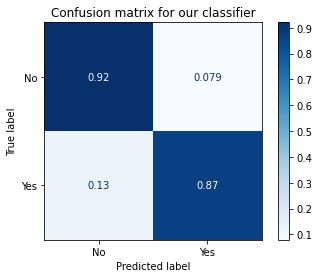

In [57]:
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

### Model 7: Gaussian Naive Bayes (with balanced target class)


In [59]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [61]:
predicted= model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8342541436464088


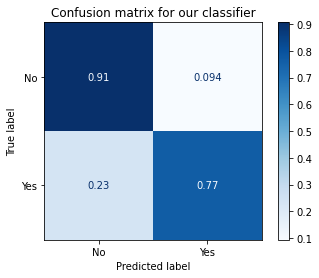

In [65]:
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()